Task 2 — Quantitative Analysis using TA-Lib and Stock Data

In [9]:
# ============================
# IMPORTS
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import talib
import yfinance as yf  # stable alternative to PyNance
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')


Step 1 — Load and Prepare Stock Data

In [10]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

# Dictionary to store all stock DataFrames
stock_data = {}

for symbol in tickers:
    print(f"Fetching data for {symbol}...")
    
    # Download historical daily data
    df = yf.download(symbol, start='2020-01-01', end='2023-11-20', progress=False)
    
    # Ensure essential columns exist
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    
    # Store in dictionary
    stock_data[symbol] = df

print("✅ All stock data loaded.")


Fetching data for AAPL...
Fetching data for AMZN...
Fetching data for GOOG...
Fetching data for META...
Fetching data for MSFT...
Fetching data for NVDA...
✅ All stock data loaded.


Step 2 — Calculate Technical Indicators with TA-Lib

In [11]:
for symbol, df in stock_data.items():
    # Ensure Close is numeric and strictly 1D
    close = df['Close'].astype(float).values.ravel()  # .ravel() ensures 1D
    
    # Calculate TA indicators
    df['SMA_20'] = talib.SMA(close, timeperiod=20)
    df['SMA_50'] = talib.SMA(close, timeperiod=50)
    df['RSI_14'] = talib.RSI(close, timeperiod=14)
    
    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal

print("✅ Technical indicators calculated for all stocks.")


✅ Technical indicators calculated for all stocks.


Step 3 — Visualize Stock Prices and Indicators

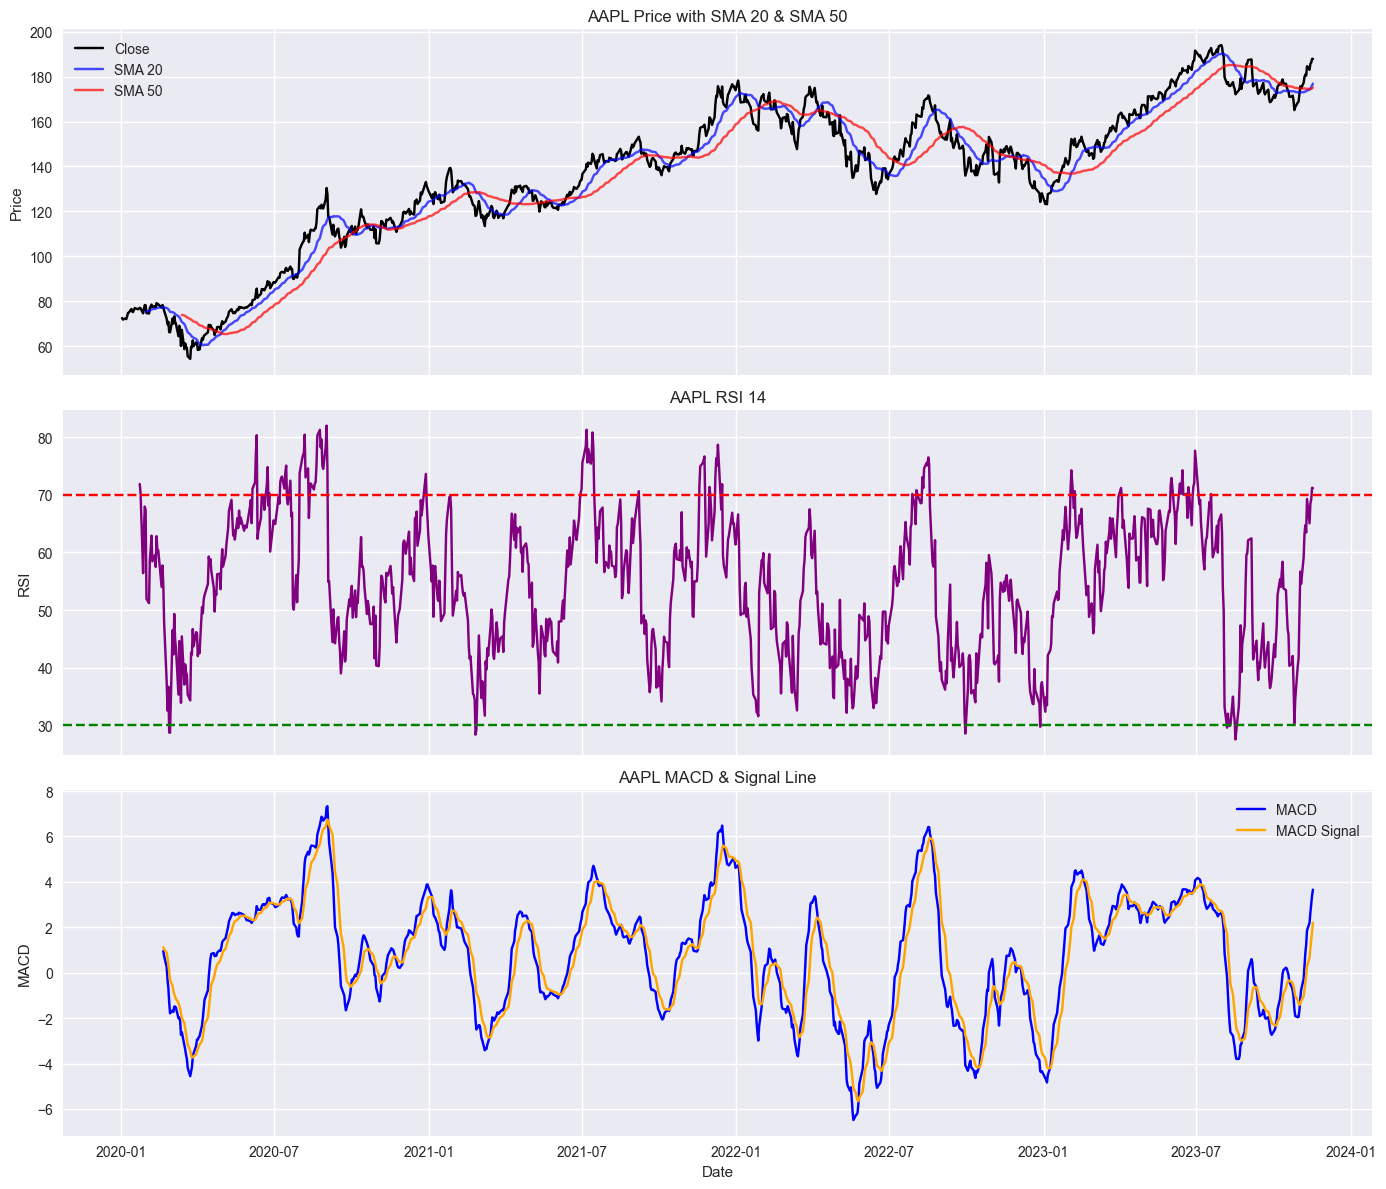

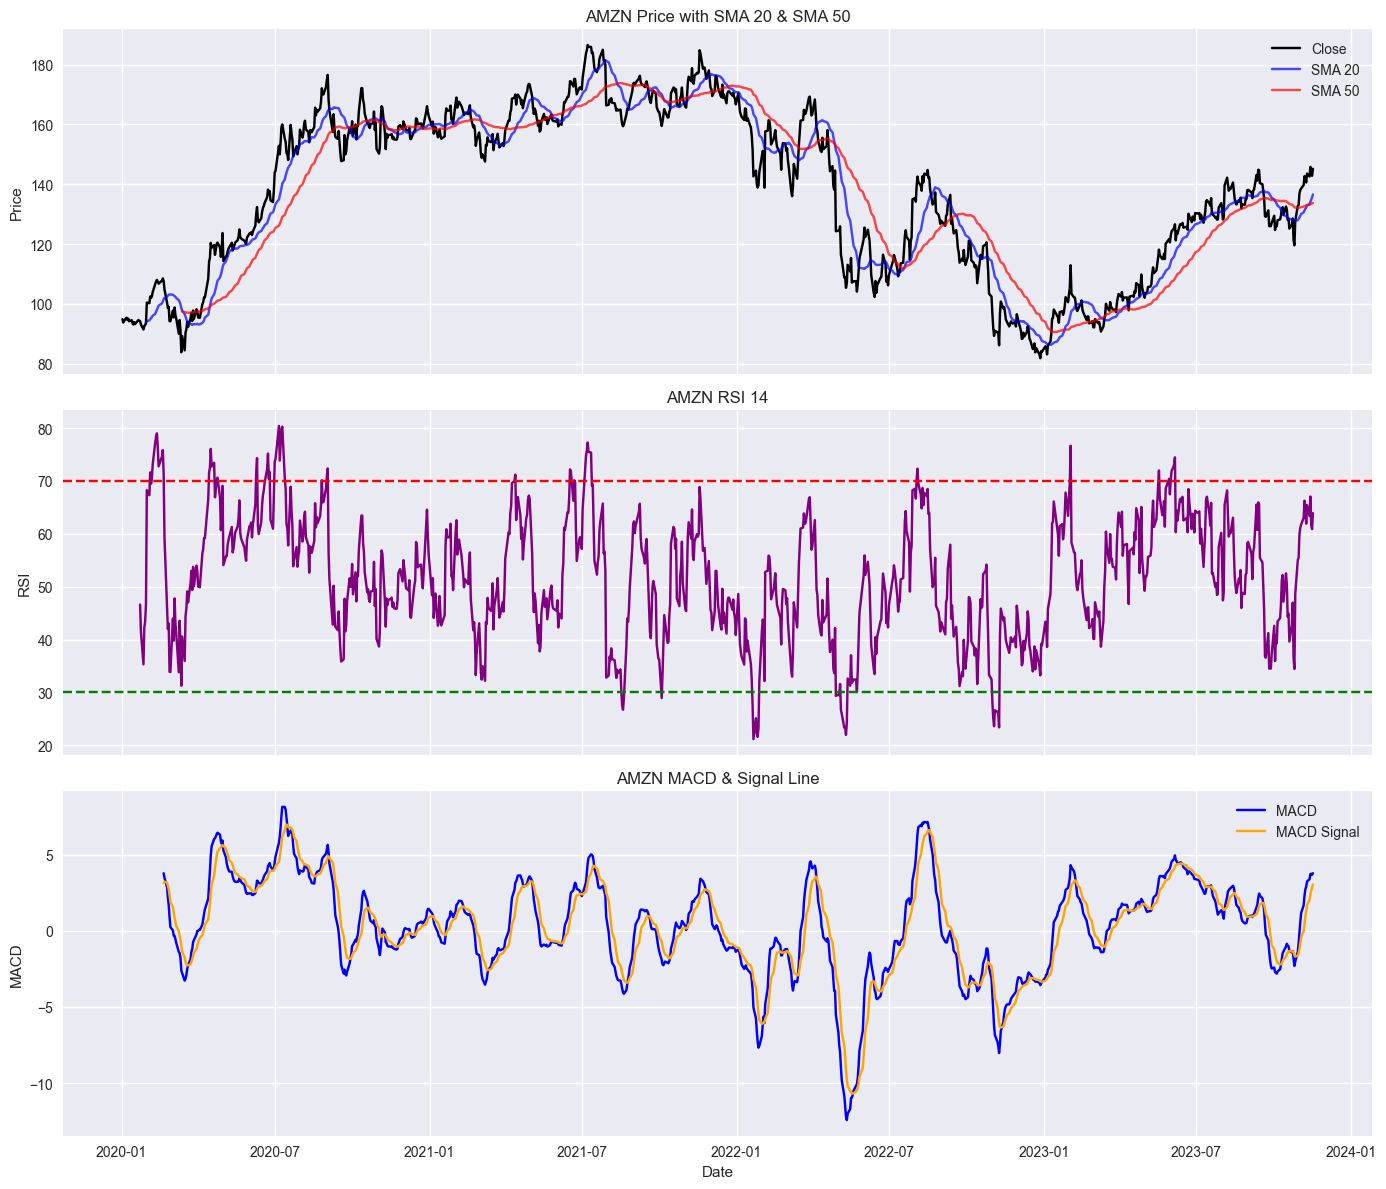

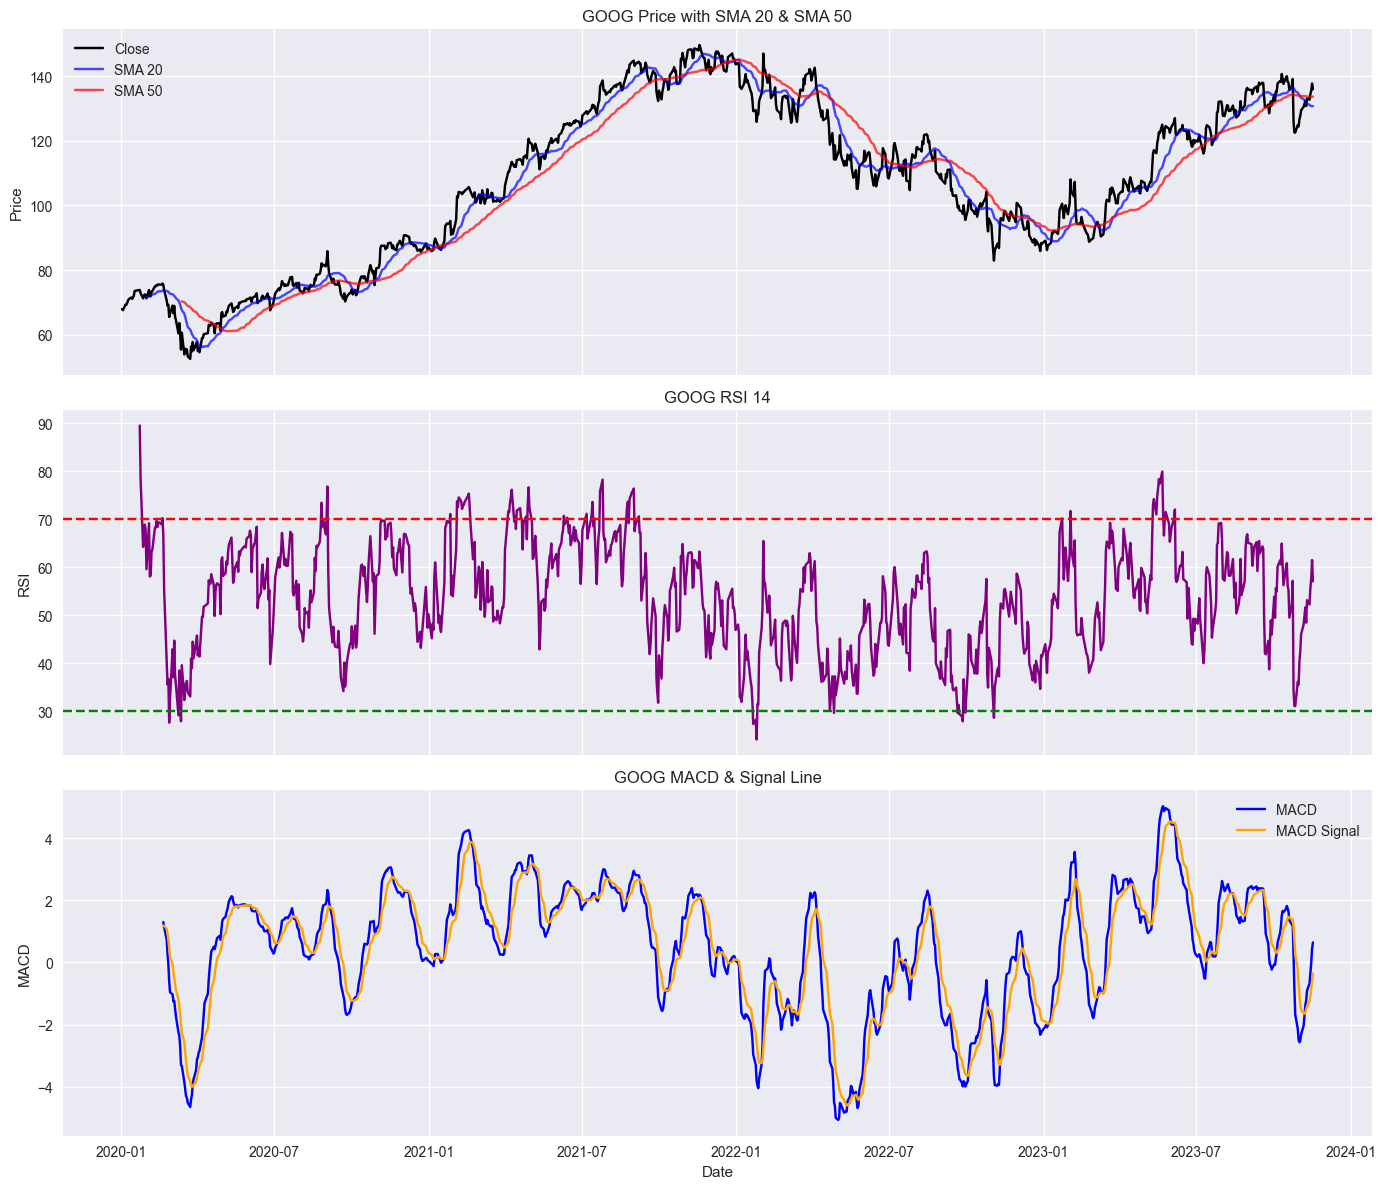

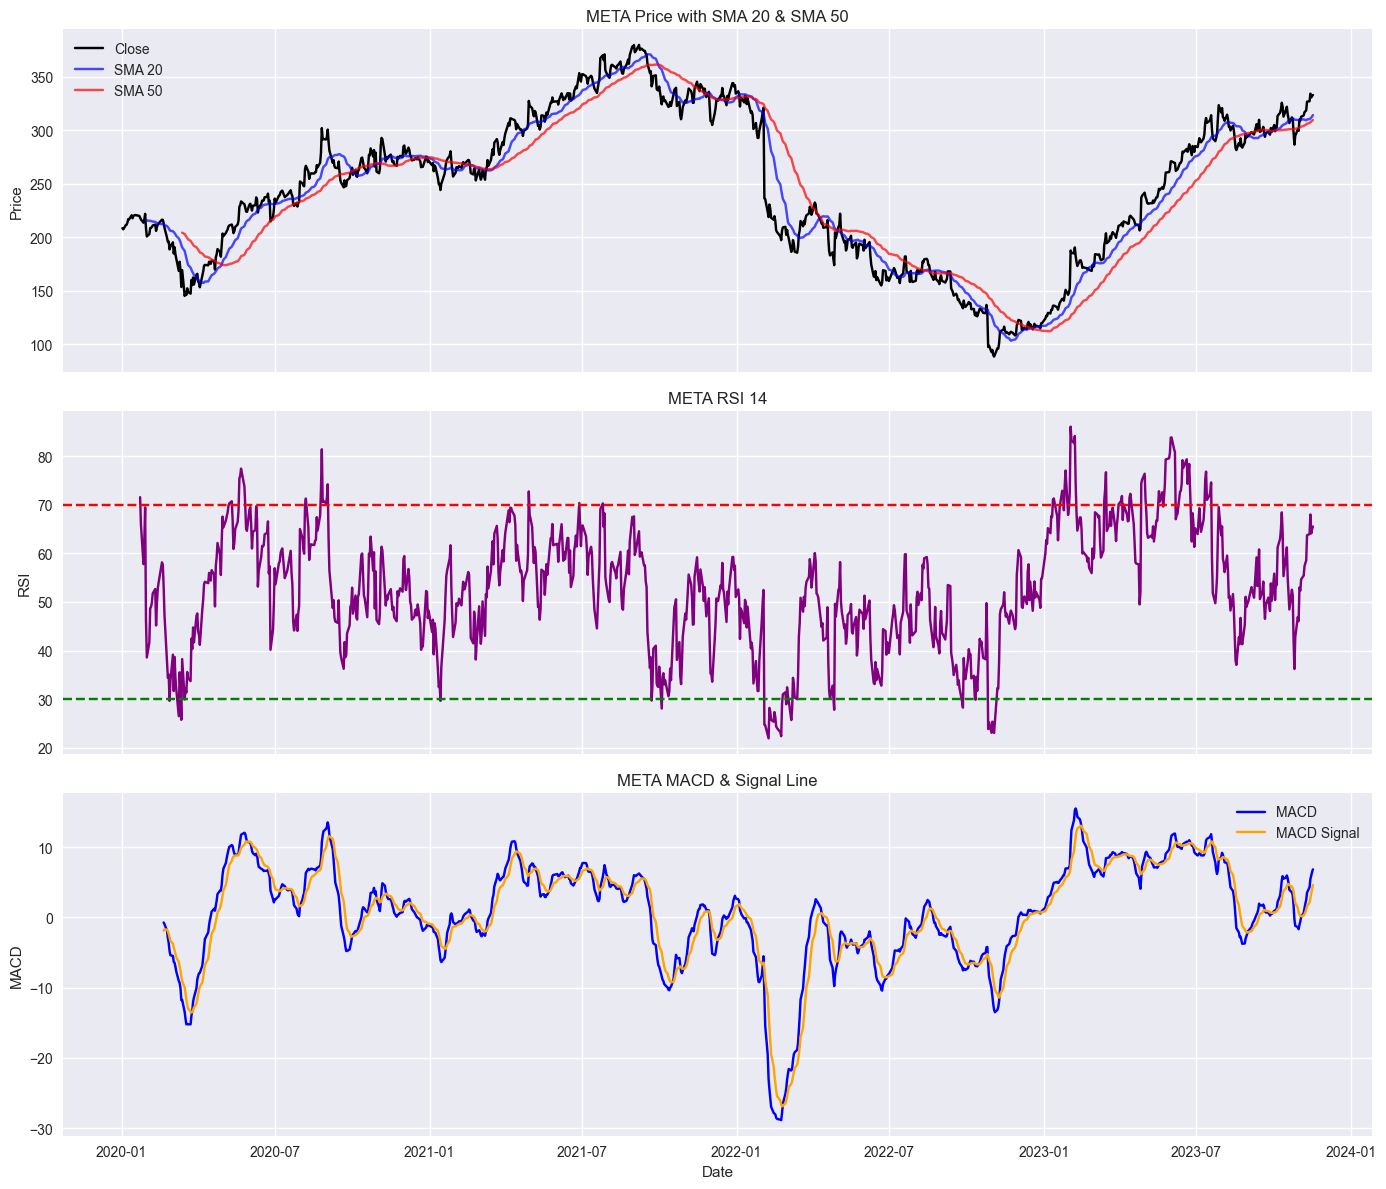

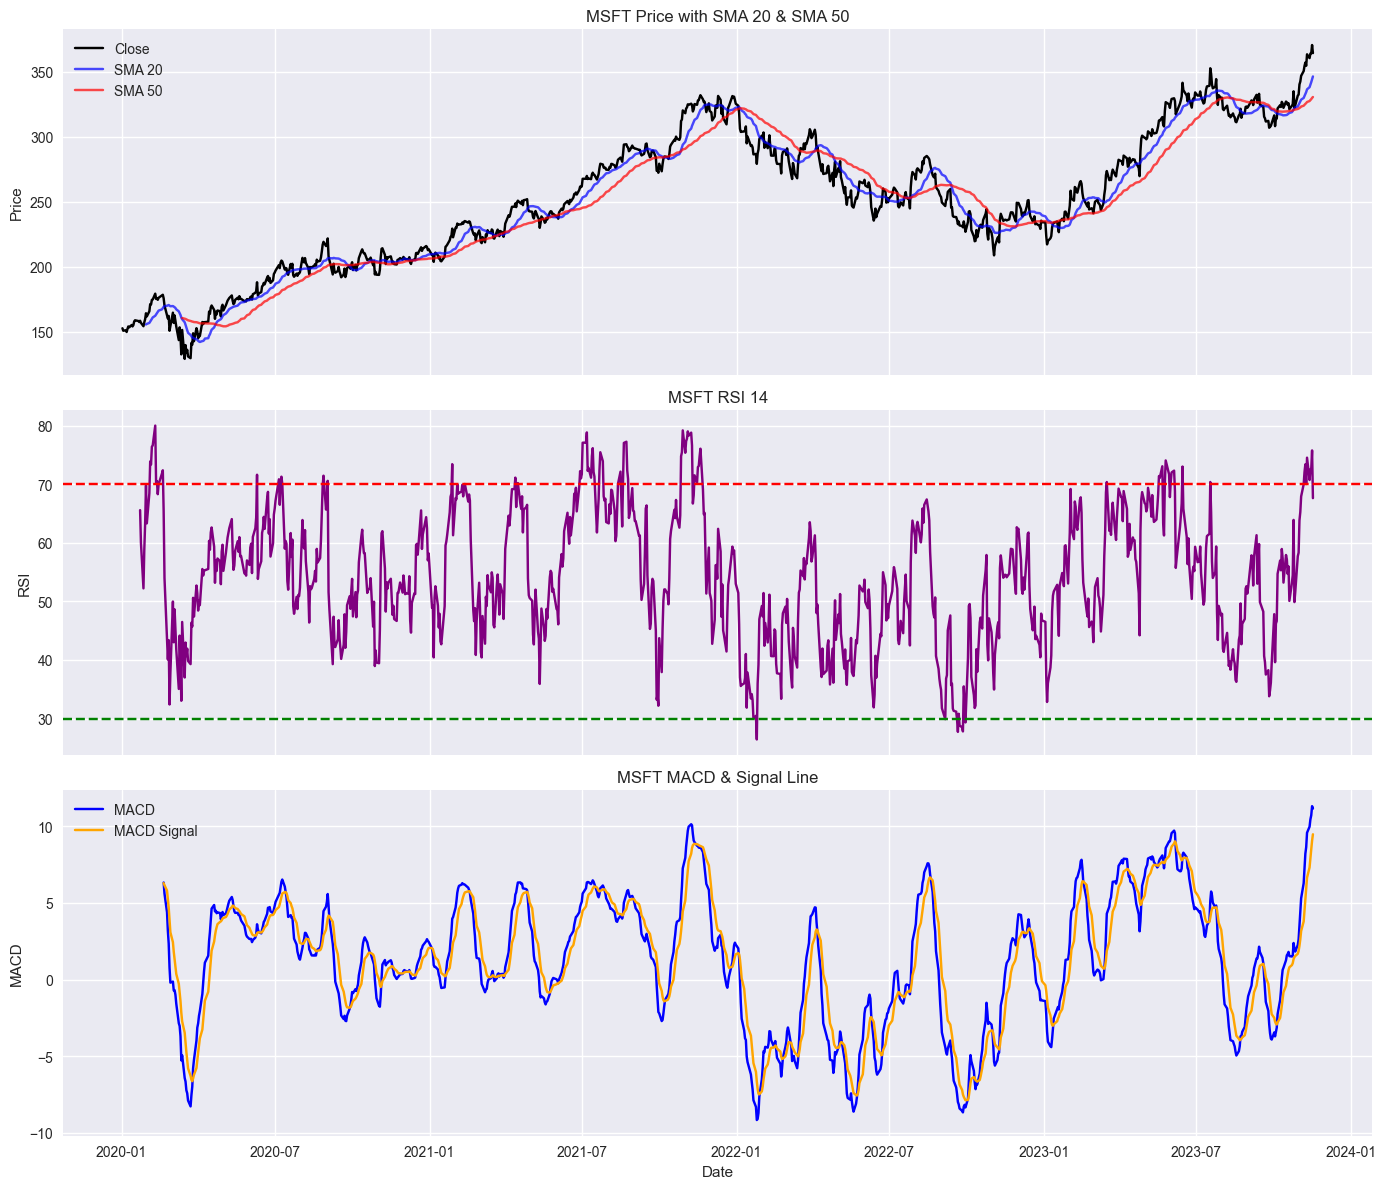

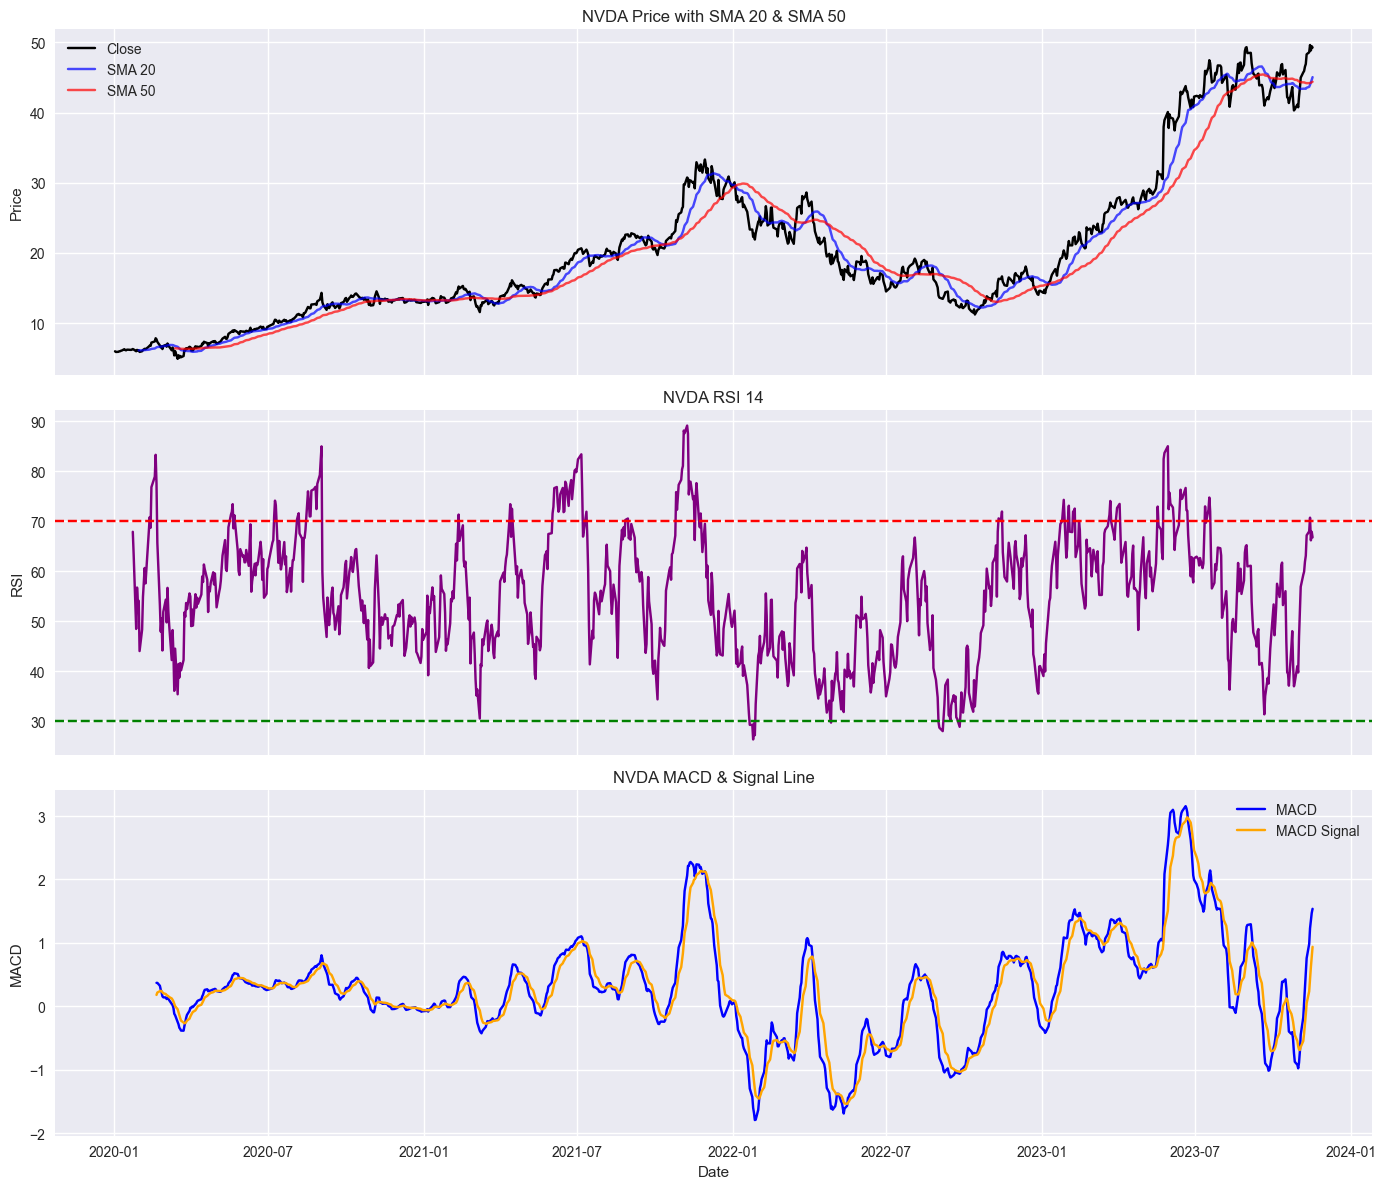

In [12]:
import matplotlib.pyplot as plt

for symbol, df in stock_data.items():
    df = df.copy()  # avoid modifying original
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    # --- 1️⃣ Price + SMAs ---
    axes[0].plot(df.index, df['Close'], label='Close', color='black')
    axes[0].plot(df.index, df['SMA_20'], label='SMA 20', color='blue', alpha=0.7)
    axes[0].plot(df.index, df['SMA_50'], label='SMA 50', color='red', alpha=0.7)
    axes[0].set_title(f"{symbol} Price with SMA 20 & SMA 50")
    axes[0].set_ylabel("Price")
    axes[0].legend()
    
    # --- 2️⃣ RSI ---
    axes[1].plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
    axes[1].axhline(70, color='red', linestyle='--')
    axes[1].axhline(30, color='green', linestyle='--')
    axes[1].set_title(f"{symbol} RSI 14")
    axes[1].set_ylabel("RSI")
    
    # --- 3️⃣ MACD ---
    axes[2].plot(df.index, df['MACD'], label='MACD', color='blue')
    axes[2].plot(df.index, df['MACD_Signal'], label='MACD Signal', color='orange')
    axes[2].set_title(f"{symbol} MACD & Signal Line")
    axes[2].set_ylabel("MACD")
    axes[2].legend()
    
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()
